In [51]:
import pandas as pd
import numpy as np

In [52]:
gender=pd.read_csv('gender_classification_v7.csv')

In [53]:
gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(gender.drop(columns=['gender']), 
                                                    gender['gender'],
                 test_size=0.25, random_state=2500)

In [56]:
gender.info
y_train.info

<bound method Series.info of 3035    Female
4688    Female
2641      Male
4829      Male
2462      Male
         ...  
604     Female
4006      Male
2113    Female
3936      Male
160     Female
Name: gender, Length: 3750, dtype: object>

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=7,random_state=2500)
forest.fit(X_train,y_train)
forest.score(X_test,y_test)

0.9672262190247801

In [58]:
forest.score(X_train,y_train)

0.9949333333333333

In [59]:
forest.feature_importances_

array([0.00393564, 0.06465383, 0.04763748, 0.30249953, 0.29084732,
       0.09296724, 0.19745896])

In [60]:
import matplotlib.pyplot as plt

In [61]:
n_features=X_train.shape[1]
np.arange(n_features)

array([0, 1, 2, 3, 4, 5, 6])

Text(0, 0.5, 'feature names')

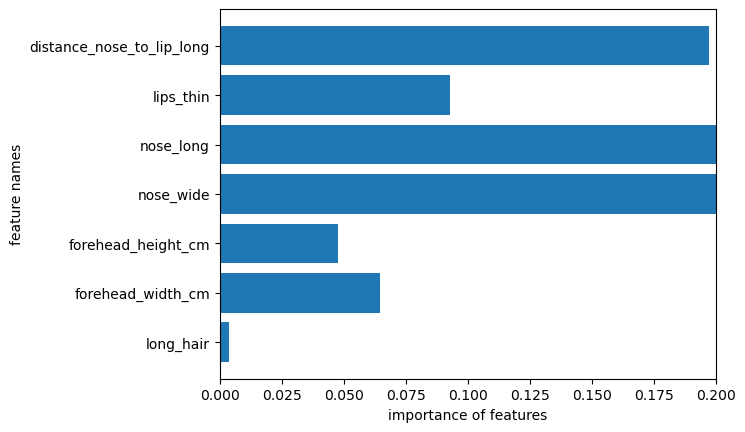

In [62]:
plt.barh(range(n_features),forest.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

Text(0, 0.5, 'feature names')

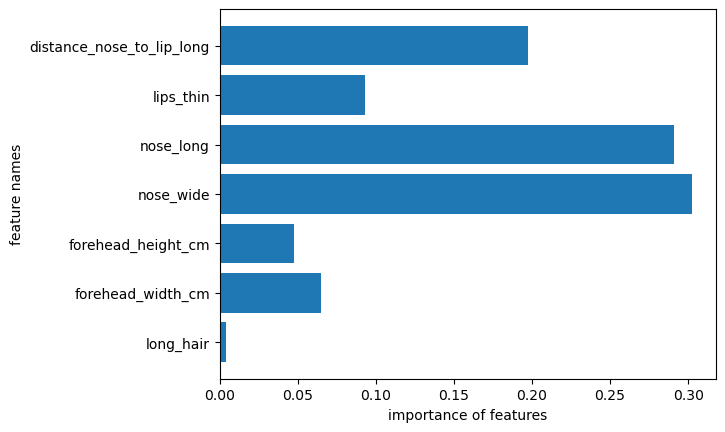

In [63]:
plt.barh(range(n_features),forest.feature_importances_)
plt.yticks(ticks=np.arange(n_features), labels=X_train.columns)
#plt.xlim(right=0.2) 
plt.show
plt.xlabel("importance of features")
plt.ylabel("feature names")

In [64]:
train_data_score_RF=forest.score(X_train,y_train)
test_data_score_RF=forest.score(X_test,y_test)

print('the score of the random forest in training data is'+str(train_data_score_RF))
print('the score of the random forest in test data is'+str(test_data_score_RF))

the score of the random forest in training data is0.9949333333333333
the score of the random forest in test data is0.9672262190247801


In [65]:
from sklearn import metrics 
from sklearn.metrics import classification_report
import seaborn as sns

In [66]:
y_predict = forest.predict(X_test)

In [67]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

([<matplotlib.axis.YTick at 0x7fb1100cc850>,
 [Text(0, 0.5, 'Female'), Text(0, 1.5, 'Male')])

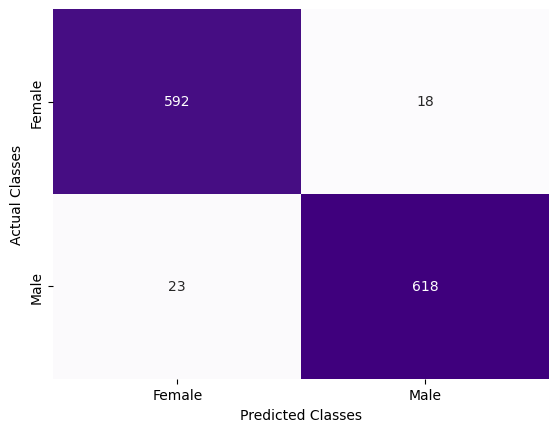

In [68]:
sns.heatmap(confusion_matrix, cmap='Purples', annot=True, cbar=False, fmt='d')
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.xticks(np.arange(2) + 0.5, ["Female", "Male"])
plt.yticks(np.arange(2) + 0.5, ["Female", "Male"])

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000
